# Stock Market Trends Pre-Covid to Present
---

### Analysis

The stock market has experienced crashes throughout history, but few anticipated a pandemic in the 21st century. When COVID-19 struck, it triggered widespread panic and uncertainty, posing significant challenges to both the stock market and cryptocurrency. How deeply were these markets impacted by the pandemic? Which stocks managed to thrive, and which ones saw a sharp decline? And where do these stocks stand today—have they fully recovered?

In this analysis, we reviewed six assets: two tech stocks, two biotech stocks, and two cryptocurrencies. We analyzed their performance from 2018 to the present to identify trends before, during, and after COVID-19. This helps us understand how to better position our investments in case another health crisis arises in the future. Here's what we found:

- Cryptocurrencies (BTC and ETH) tend to show higher volatility compared to traditional stocks, with sharper rises and declines. Ethereum, in particular, shows the strongest positive and negative movements over the years.

- Tech Stocks (GOOGL, AAPL) have smaller, more stable changes with less extreme fluctuations, indicating steadier growth.

- Pharma Stocks (PFE, MRNA) were significantly impacted by the COVID pandemic, particularly Moderna (MRNA), which had large losses in 2018 but strong positive gains during the COVID-19 vaccine rollout in 2020 and then dropped again post covid.


Key Conclusion:

Cryptos exhibit much higher volatility with rapid changes compared to traditional stocks, which have more stable performance. Stocks like Google and Apple show consistent, albeit smaller, percentage changes, while pharma companies like Moderna and Pfizer experience notable spikes during the COVID-19 period, due to high demand in vaccine. 

In the event of another health crisis, it's wise to hold onto tech stocks, as they are likely to continue rising. For biotech stocks, consider selling a year or two after the crisis begins, as their value may drop when demand decreases. Crypto is highly volatile, so invest with caution. While it rose during COVID-19, it may decline once a vaccine is developed and the threat diminishes, or it could spike one year and then drop the next.



In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
# Load Datasets
stocks_df = pd.read_csv("Resources/sp500_stocks.csv")
# Crypto dataset
eth_df = pd.read_csv("Resources/ETH_2017_2024.csv")
btc_df = pd.read_csv("Resources/BTC_2014_2024.csv")

# Crypto Data

In [3]:
# Preview Bitcoin CSV and clean
btc_df.head()

# Remove dates earlier than 2017-11-10
btc_df = btc_df.drop(['Adj Close', 'Volume'], axis=1)
btc_df

,Date,Open,High,Low,Close
0,2014-09-18,456.859985,456.859985,413.104004,424.440002
1,2014-09-19,424.102997,427.834991,384.532013,394.795990
2,2014-09-20,394.673004,423.295990,389.882996,408.903992
3,2014-09-21,408.084991,412.425995,393.181000,398.821014
4,2014-09-22,399.100006,406.915985,397.130005,402.152008
...,...,...,...,...,...
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250
3411,2024-01-20,NaN,NaN,NaN,NaN


In [4]:
# Change column names
btc_df = btc_df.rename(columns={'Open': 'BTC Open', 'High': 'BTC High', 'Low': 'BTC Low', 'Close': 'BTC Close'})
btc_df

,Date,BTC Open,BTC High,BTC Low,BTC Close
0,2014-09-18,456.859985,456.859985,413.104004,424.440002
1,2014-09-19,424.102997,427.834991,384.532013,394.795990
2,2014-09-20,394.673004,423.295990,389.882996,408.903992
3,2014-09-21,408.084991,412.425995,393.181000,398.821014
4,2014-09-22,399.100006,406.915985,397.130005,402.152008
...,...,...,...,...,...
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250
3411,2024-01-20,NaN,NaN,NaN,NaN


In [5]:
# Drop null values and set index
btc_df = btc_df.dropna()
btc_df = btc_df.set_index('Date')
btc_df

,BTC Open,BTC High,BTC Low,BTC Close
Date,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
2014-09-22,399.100006,406.915985,397.130005,402.152008
...,...,...,...,...
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594


In [6]:
# Preview eth
eth_df.head()

# Remove columns
eth_df = eth_df.drop(['Adj Close', 'Volume'], axis=1)

In [7]:
# Change column names
eth_df = eth_df.rename(columns={'Open': 'ETH Open', 'High': 'ETH High', 'Low': 'ETH Low', 'Close': 'ETH Close'})

# Drop null values
eth_df = eth_df.dropna()

# Reset index
eth_df = eth_df.set_index('Date')
eth_df

,ETH Open,ETH High,ETH Low,ETH Close
Date,,,,
2017-11-10,320.670990,324.717987,294.541992,299.252991
2017-11-11,298.585999,319.453003,298.191986,314.681000
2017-11-12,314.690002,319.153015,298.513000,307.907990
2017-11-13,307.024994,328.415009,307.024994,316.716003
2017-11-14,316.763000,340.177002,316.763000,337.631012
...,...,...,...,...
2024-01-16,2510.627197,2613.566895,2500.003906,2587.691162
2024-01-17,2587.044678,2592.737061,2508.432861,2528.369385
2024-01-18,2528.593262,2546.263916,2426.135498,2467.018799


In [8]:
# Inner merge of crypto DataFrames
crypto_df = pd.merge(btc_df, eth_df, left_index=True, right_index=True, how='inner')

# Change date time formate
crypto_df.index = pd.to_datetime(crypto_df.index)
crypto_df

,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close
Date,,,,,,,,
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,320.670990,324.717987,294.541992,299.252991
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,298.585999,319.453003,298.191986,314.681000
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,314.690002,319.153015,298.513000,307.907990
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,307.024994,328.415009,307.024994,316.716003
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,316.763000,340.177002,316.763000,337.631012
...,...,...,...,...,...,...,...,...
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,2510.627197,2613.566895,2500.003906,2587.691162
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,2587.044678,2592.737061,2508.432861,2528.369385
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,2528.593262,2546.263916,2426.135498,2467.018799


In [9]:
# Calculate percentage changes
crypto_df['BTC %Change'] = ((crypto_df['BTC Close'] - crypto_df['BTC Open']) / crypto_df['BTC Open']) * 100
crypto_df['ETH %Change'] = ((crypto_df['ETH Close'] - crypto_df['ETH Open']) / crypto_df['ETH Open']) * 100
crypto_df

,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close,BTC %Change,ETH %Change
Date,,,,,,,,,,
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,320.670990,324.717987,294.541992,299.252991,-7.744783,-6.679120
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,298.585999,319.453003,298.191986,314.681000,-3.943574,5.390407
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,314.690002,319.153015,298.513000,307.907990,-5.486190,-2.155141
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,307.024994,328.415009,307.024994,316.716003,10.461672,3.156423
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,316.763000,340.177002,316.763000,337.631012,1.131910,6.587894
...,...,...,...,...,...,...,...,...,...,...
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,2510.627197,2613.566895,2500.003906,2587.691162,1.542634,3.069510
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,2587.044678,2592.737061,2508.432861,2528.369385,-0.902922,-2.268043
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,2528.593262,2546.263916,2426.135498,2467.018799,-3.463205,-2.435127


## Stock Data

First, we look at Pharmaceutical companies Pfizer and Moderna.

In [10]:
# Import stock csv
stocks_df = pd.read_csv("Resources/sp500_stocks.csv")
stocks_df.head()

# Remove Adj Close and Volume columns
stocks_df = stocks_df.drop(['Adj Close', 'Volume'], axis=1)
stocks_df

,Date,Symbol,Close,High,Low,Open
0,2010-01-04,MMM,69.414719,69.774246,69.122070,69.473244
1,2010-01-05,MMM,68.979935,69.590302,68.311035,69.230766
2,2010-01-06,MMM,69.958191,70.735786,69.824417,70.133781
3,2010-01-07,MMM,70.008362,70.033447,68.662209,69.665550
4,2010-01-08,MMM,70.501671,70.501671,69.648827,69.974915
...,...,...,...,...,...,...
1862101,2024-09-12,ZTS,190.710007,190.869995,187.139999,189.979996
1862102,2024-09-13,ZTS,191.089996,192.619995,190.139999,190.570007
1862103,2024-09-16,ZTS,194.250000,194.449997,191.210007,192.250000
1862104,2024-09-17,ZTS,195.710007,196.309998,194.000000,194.479996


In [11]:
# Set index
stocks_df = stocks_df.set_index('Date')
stocks_df

,Symbol,Close,High,Low,Open
Date,,,,,
2010-01-04,MMM,69.414719,69.774246,69.122070,69.473244
2010-01-05,MMM,68.979935,69.590302,68.311035,69.230766
2010-01-06,MMM,69.958191,70.735786,69.824417,70.133781
2010-01-07,MMM,70.008362,70.033447,68.662209,69.665550
2010-01-08,MMM,70.501671,70.501671,69.648827,69.974915
...,...,...,...,...,...
2024-09-12,ZTS,190.710007,190.869995,187.139999,189.979996
2024-09-13,ZTS,191.089996,192.619995,190.139999,190.570007
2024-09-16,ZTS,194.250000,194.449997,191.210007,192.250000


In [12]:
# Change date time formate
stocks_df.index = pd.to_datetime(stocks_df.index)
stocks_df

,Symbol,Close,High,Low,Open
Date,,,,,
2010-01-04,MMM,69.414719,69.774246,69.122070,69.473244
2010-01-05,MMM,68.979935,69.590302,68.311035,69.230766
2010-01-06,MMM,69.958191,70.735786,69.824417,70.133781
2010-01-07,MMM,70.008362,70.033447,68.662209,69.665550
2010-01-08,MMM,70.501671,70.501671,69.648827,69.974915
...,...,...,...,...,...
2024-09-12,ZTS,190.710007,190.869995,187.139999,189.979996
2024-09-13,ZTS,191.089996,192.619995,190.139999,190.570007
2024-09-16,ZTS,194.250000,194.449997,191.210007,192.250000


In [13]:
# Locate Pfizer stock data and drop null values
pfe_df = stocks_df.loc[stocks_df['Symbol'].isin(['PFE'])]
pfe_df.dropna()

# Delete Symbol column
pfe_df = pfe_df.drop(['Symbol'], axis=1)

# Rename columns
pfe_df = pfe_df.rename(columns={'Open': 'PFE Open', 'High': 'PFE High', 'Low': 'PFE Low', 'Close': 'PFE Close'})

pfe_df

,PFE Close,PFE High,PFE Low,PFE Open
Date,,,,
2010-01-04,17.960152,17.969639,17.305504,17.333965
2010-01-05,17.703985,17.960152,17.599621,17.950665
2010-01-06,17.647058,17.846300,17.561670,17.703985
2010-01-07,17.580645,17.713472,17.514231,17.685009
2010-01-08,17.722960,17.751423,17.571157,17.666035
...,...,...,...,...
2024-09-12,29.160000,29.709999,28.760000,29.580000
2024-09-13,29.270000,29.320000,28.990000,29.160000
2024-09-16,30.070000,30.139999,29.440001,29.570000


In [14]:
# Locate Moderna stock data and drop null values

mrna_df = stocks_df.loc[stocks_df['Symbol'].isin(['MRNA'])]
mrna_df = mrna_df.dropna()

# Delete Symbol column
mrna_df = mrna_df.drop(['Symbol'], axis=1)

# Rename columns
mrna_df = mrna_df.rename(columns={'Open': 'MRNA Open', 'High': 'MRNA High', 'Low': 'MRNA Low', 'Close': 'MRNA Close'})
mrna_df

,MRNA Close,MRNA High,MRNA Low,MRNA Open
Date,,,,
2018-12-07,18.600000,22.750000,18.510000,22.000000
2018-12-10,18.799999,19.438999,18.000000,18.900000
2018-12-11,18.010000,20.660000,17.990000,20.549999
2018-12-12,18.680000,19.480000,18.020000,18.549999
2018-12-13,18.760000,19.290001,18.680000,19.250000
...,...,...,...,...
2024-09-12,69.680000,70.849998,64.110001,67.889999
2024-09-13,68.279999,68.580002,65.550003,66.169998
2024-09-16,69.169998,70.599998,67.809998,68.120003


In [15]:
# Merge pharma dataframes
pharma_df = pd.merge(pfe_df, mrna_df, left_index=True, right_index=True, how='inner')
pharma_df

,PFE Close,PFE High,PFE Low,PFE Open,MRNA Close,MRNA High,MRNA Low,MRNA Open
Date,,,,,,,,
2018-12-07,41.669830,42.637569,41.442123,42.523720,18.600000,22.750000,18.510000,22.000000
2018-12-10,42.125237,42.277039,40.863377,41.878559,18.799999,19.438999,18.000000,18.900000
2018-12-11,41.755219,42.229603,41.337761,41.821632,18.010000,20.660000,17.990000,20.549999
2018-12-12,41.897533,42.552181,41.888046,42.077801,18.680000,19.480000,18.020000,18.549999
2018-12-13,42.286530,42.599621,41.944973,42.182163,18.760000,19.290001,18.680000,19.250000
...,...,...,...,...,...,...,...,...
2024-09-12,29.160000,29.709999,28.760000,29.580000,69.680000,70.849998,64.110001,67.889999
2024-09-13,29.270000,29.320000,28.990000,29.160000,68.279999,68.580002,65.550003,66.169998
2024-09-16,30.070000,30.139999,29.440001,29.570000,69.169998,70.599998,67.809998,68.120003


In [16]:
# Calculate percentage changes
pharma_df['PFE %Change'] = ((pharma_df['PFE Close'] - pharma_df['PFE Open']) / pharma_df['PFE Open']) * 100
pharma_df['MRNA %Change'] = ((pharma_df['MRNA Close'] - pharma_df['MRNA Open']) / pharma_df['MRNA Open']) * 100
pharma_df

,PFE Close,PFE High,PFE Low,PFE Open,MRNA Close,MRNA High,MRNA Low,MRNA Open,PFE %Change,MRNA %Change
Date,,,,,,,,,,
2018-12-07,41.669830,42.637569,41.442123,42.523720,18.600000,22.750000,18.510000,22.000000,-2.008031,-15.454544
2018-12-10,42.125237,42.277039,40.863377,41.878559,18.799999,19.438999,18.000000,18.900000,0.589030,-0.529103
2018-12-11,41.755219,42.229603,41.337761,41.821632,18.010000,20.660000,17.990000,20.549999,-0.158803,-12.360093
2018-12-12,41.897533,42.552181,41.888046,42.077801,18.680000,19.480000,18.020000,18.549999,-0.428414,0.700814
2018-12-13,42.286530,42.599621,41.944973,42.182163,18.760000,19.290001,18.680000,19.250000,0.247418,-2.545453
...,...,...,...,...,...,...,...,...,...,...
2024-09-12,29.160000,29.709999,28.760000,29.580000,69.680000,70.849998,64.110001,67.889999,-1.419879,2.636619
2024-09-13,29.270000,29.320000,28.990000,29.160000,68.279999,68.580002,65.550003,66.169998,0.377231,3.188757
2024-09-16,30.070000,30.139999,29.440001,29.570000,69.169998,70.599998,67.809998,68.120003,1.690903,1.541391


Next, we look at the tech industry and investigate Apple and Google.

In [17]:
# Create tech dataframe
aapl_df = stocks_df.loc[stocks_df['Symbol'].isin(['AAPL'])]
googl_df = stocks_df.loc[stocks_df['Symbol'].isin(['GOOGL'])]

aapl_df = aapl_df.dropna()
googl_df = googl_df.dropna()

aapl_df = aapl_df.drop(['Symbol'], axis=1)
aapl_df = aapl_df.rename(columns={'Open': 'AAPL Open', 'High': 'AAPL High', 'Low': 'AAPL Low', 'Close': 'AAPL Close'})

googl_df = googl_df.drop(['Symbol'], axis=1)
googl_df = googl_df.rename(columns={'Open': 'GOOGL Open', 'High': 'GOOGL High', 'Low': 'GOOGL Low', 'Close': 'GOOGL Close'})

tech_df = pd.merge(aapl_df, googl_df, left_index=True, right_index=True, how='inner')
tech_df

,AAPL Close,AAPL High,AAPL Low,AAPL Open,GOOGL Close,GOOGL High,GOOGL Low,GOOGL Open
Date,,,,,,,,
2010-01-04,7.643214,7.660714,7.585000,7.622500,15.684434,15.753504,15.621622,15.689439
2010-01-05,7.656429,7.699643,7.616071,7.664286,15.615365,15.711712,15.554054,15.695195
2010-01-06,7.534643,7.686786,7.526786,7.656429,15.221722,15.662162,15.174174,15.662162
2010-01-07,7.520714,7.571429,7.466071,7.562500,14.867367,15.265265,14.831081,15.250250
2010-01-08,7.570714,7.571429,7.466429,7.510714,15.065566,15.096346,14.742492,14.814815
...,...,...,...,...,...,...,...,...
2024-09-12,222.770004,223.550003,219.820007,222.500000,154.690002,154.820007,152.649994,153.800003
2024-09-13,222.500000,224.039993,221.910004,223.580002,157.460007,158.380005,155.210007,155.429993
2024-09-16,216.320007,217.220001,213.919998,216.539993,158.059998,158.250000,156.600006,157.309998


In [18]:
# Drop dates earlier than 2018-12-07
tech_df = tech_df.loc['2018-12-07':] 

In [19]:
# Calculate percentage changes
tech_df['AAPL %Change'] = ((tech_df['AAPL Close'] - tech_df['AAPL Open']) / tech_df['AAPL Open']) * 100
tech_df['GOOGL %Change'] = ((tech_df['GOOGL Close'] - tech_df['GOOGL Open']) / tech_df['GOOGL Open']) * 100
tech_df

C:\Users\zbrown\AppData\Local\Temp\ipykernel_31032\3993059784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['AAPL %Change'] = ((tech_df['AAPL Close'] - tech_df['AAPL Open']) / tech_df['AAPL Open']) * 100
C:\Users\zbrown\AppData\Local\Temp\ipykernel_31032\3993059784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['GOOGL %Change'] = ((tech_df['GOOGL Close'] - tech_df['GOOGL Open']) / tech_df['GOOGL Open']) * 100


,AAPL Close,AAPL High,AAPL Low,AAPL Open,GOOGL Close,GOOGL High,GOOGL Low,GOOGL Open,AAPL %Change,GOOGL %Change
Date,,,,,,,,,,
2018-12-07,42.122501,43.622501,42.075001,43.372501,52.328999,54.251499,51.968498,53.611500,-2.882010,-2.392213
2018-12-10,42.400002,42.522499,40.832500,41.250000,52.659000,52.980000,51.650002,52.146999,2.787882,0.981842
2018-12-11,42.157501,42.947498,41.750000,42.915001,53.082500,53.520000,52.505001,53.347000,-1.765116,-0.495810
2018-12-12,42.275002,42.980000,42.255001,42.599998,53.686501,54.586498,53.598499,53.854000,-0.762904,-0.311025
2018-12-13,42.737499,43.142502,42.387501,42.622501,53.676998,54.421001,53.249500,53.783501,0.269806,-0.198021
...,...,...,...,...,...,...,...,...,...,...
2024-09-12,222.770004,223.550003,219.820007,222.500000,154.690002,154.820007,152.649994,153.800003,0.121350,0.578673
2024-09-13,222.500000,224.039993,221.910004,223.580002,157.460007,158.380005,155.210007,155.429993,-0.483049,1.306063
2024-09-16,216.320007,217.220001,213.919998,216.539993,158.059998,158.250000,156.600006,157.309998,-0.101591,0.476766


In [20]:
# Create one giant DataFrame
crypto_pharma_df = pd.merge(crypto_df, pharma_df, left_index=True, right_index=True, how='inner')

all_df = pd.merge(crypto_pharma_df, tech_df, left_index=True, right_index=True, how='inner')
all_df

,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close,BTC %Change,ETH %Change,...,AAPL Close,AAPL High,AAPL Low,AAPL Open,GOOGL Close,GOOGL High,GOOGL Low,GOOGL Open,AAPL %Change,GOOGL %Change
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-07,3512.590332,3512.590332,3280.228760,3419.937256,91.649834,96.089844,83.469719,93.294563,-2.637742,1.794579,...,42.122501,43.622501,42.075001,43.372501,52.328999,54.251499,51.968498,53.611500,-2.882010,-2.392213
2018-12-10,3612.046387,3647.332520,3470.144531,3502.656006,94.992172,96.257301,90.654251,91.685654,-3.028488,-3.480832,...,42.400002,42.522499,40.832500,41.250000,52.659000,52.980000,51.650002,52.146999,2.787882,0.981842
2018-12-11,3497.554688,3513.185059,3392.250000,3424.588135,91.578934,92.782326,87.688408,88.945305,-2.086216,-2.875802,...,42.157501,42.947498,41.750000,42.915001,53.082500,53.520000,52.505001,53.347000,-1.765116,-0.495810
2018-12-12,3421.458252,3534.228516,3413.481445,3486.950195,88.610703,92.240555,88.263557,90.593300,1.914153,2.237424,...,42.275002,42.980000,42.255001,42.599998,53.686501,54.586498,53.598499,53.854000,-0.762904,-0.311025
2018-12-13,3487.879395,3489.739502,3298.132080,3313.677246,90.655228,91.111603,85.518311,86.539314,-4.994500,-4.540184,...,42.737499,43.142502,42.387501,42.622501,53.676998,54.421001,53.249500,53.783501,0.269806,-0.198021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,46354.792969,46498.136719,41903.769531,42853.167969,2619.177002,2710.421875,2460.925537,2524.460205,-7.553965,-3.616281,...,185.919998,186.740005,185.190002,186.059998,142.649994,143.199997,141.820007,142.669998,-0.075244,-0.014021
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,2510.627197,2613.566895,2500.003906,2587.691162,1.542634,3.069510,...,183.630005,184.259995,180.929993,182.160004,142.490005,144.350006,141.449997,142.000000,0.806984,0.345074
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,2587.044678,2592.737061,2508.432861,2528.369385,-0.902922,-2.268043,...,182.679993,182.929993,180.300003,181.270004,141.470001,141.839996,138.899994,141.350006,0.777839,0.084892


In [21]:
# Find percent averages
all_df.resample('MS').mean()

,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close,BTC %Change,ETH %Change,...,AAPL Close,AAPL High,AAPL Low,AAPL Open,GOOGL Close,GOOGL High,GOOGL Low,GOOGL Open,AAPL %Change,GOOGL %Change
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,3651.159195,3783.083023,3553.272858,3666.656418,105.787525,112.713524,101.680298,107.393076,0.506359,1.718543,...,40.387969,41.202657,39.812969,40.663281,52.052500,53.096625,51.302312,52.209562,-0.634887,-0.277514
2019-01-01,3716.058478,3753.792178,3657.298770,3698.883894,128.809730,131.914400,124.714949,127.871377,-0.414044,-0.577412,...,38.541548,38.882619,37.986905,38.402143,54.049429,54.486357,53.350762,53.901119,0.366347,0.285400
2019-02-01,3690.056127,3737.107178,3663.532201,3706.033935,125.703815,128.510622,123.764102,126.443194,0.451715,0.678994,...,42.931973,43.220395,42.632895,42.848027,56.070789,56.509737,55.544790,56.006079,0.199719,0.121932
2019-03-01,3959.740595,3997.010521,3926.339762,3966.077323,136.622294,138.708693,134.574691,136.891692,0.167383,0.226240,...,45.823453,46.232976,45.352738,45.805953,59.216429,59.646643,58.633714,59.116619,0.056688,0.180089
2019-04-01,5110.990095,5252.916155,5038.266555,5158.161900,164.305057,169.400201,160.415627,164.859427,1.116096,0.496381,...,50.129048,50.394286,49.657738,49.966666,61.572238,61.766976,61.090691,61.400714,0.332616,0.279959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,26272.755567,26668.219141,26000.402930,26344.940234,1615.428546,1640.001276,1596.458588,1619.009747,0.282896,0.232385,...,177.002501,178.996502,175.582999,177.586500,134.303501,135.540500,133.008501,134.324500,-0.319558,-0.005957
2023-10-01,29575.315696,30307.621626,29230.398526,29817.424893,1658.064775,1687.610057,1631.549161,1658.210605,0.809755,0.014968,...,174.668638,175.907273,172.848180,174.026364,134.176819,135.473183,132.625908,134.045455,0.373536,0.097289
2023-11-01,36396.656622,37135.315476,35795.811942,36524.906622,1974.083182,2022.702846,1935.917306,1982.745414,0.385860,0.504297,...,185.879523,186.725715,184.367144,185.280478,133.382381,134.395714,132.095716,133.120954,0.344724,0.209145


In [22]:
all_reset = all_df.reset_index()

market = all_reset.set_index("Date")
market = market.resample("4M").mean()
market

C:\Users\zbrown\AppData\Local\Temp\ipykernel_31032\2828836828.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market = market.resample("4M").mean()


,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close,BTC %Change,ETH %Change,...,AAPL Close,AAPL High,AAPL Low,AAPL Open,GOOGL Close,GOOGL High,GOOGL Low,GOOGL Open,AAPL %Change,GOOGL %Change
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,3651.159195,3783.083023,3553.272858,3666.656418,105.787525,112.713524,101.680298,107.393076,0.506359,1.718543,...,40.387969,41.202657,39.812969,40.663281,52.052500,53.096625,51.302312,52.209562,-0.634887,-0.277514
2019-04-30,4129.678523,4196.135760,4081.306325,4142.685734,139.181112,142.465744,136.162543,139.323087,0.327326,0.194515,...,44.391250,44.718232,43.938658,44.290031,57.767622,58.141275,57.194262,57.645158,0.239797,0.219160
2019-08-31,9437.898602,9739.353607,9154.918713,9497.108018,233.920149,240.667536,226.240417,234.134465,0.763212,0.190890,...,49.683808,50.190436,49.232471,49.653634,57.241773,57.736674,56.758744,57.267971,0.072367,-0.043396
2019-12-31,8492.722511,8618.783523,8302.906041,8447.772316,170.288642,173.670727,165.652831,169.570082,-0.451750,-0.389773,...,61.990893,62.334822,61.406548,61.830446,63.685666,64.089196,63.246071,63.622506,0.252776,0.105571
2020-04-30,7987.867676,8209.263148,7798.870294,8033.088814,180.008104,187.056864,174.085239,181.600168,0.799238,1.222844,...,72.163433,73.238855,70.932681,71.934368,66.180157,67.058253,65.101940,66.111319,0.341176,0.128957
2020-08-31,10001.076367,10183.657985,9842.729998,10042.230894,275.825202,282.739711,269.693512,277.403178,0.457895,0.632236,...,94.324882,95.322853,93.011470,94.058324,73.473500,74.209283,72.553535,73.298112,0.309602,0.249189
2020-12-31,15139.223989,15533.049173,14836.094313,15294.716245,461.743460,475.466718,447.394355,463.547667,0.889714,0.440780,...,119.007411,120.872471,117.253529,119.261294,82.012500,83.044682,81.100065,82.058118,-0.184436,-0.053073
2021-04-30,48369.204554,50135.647175,46518.349205,48720.459461,1740.753135,1818.006267,1663.055013,1760.128920,0.938212,1.207827,...,129.242805,130.799879,127.638293,129.396098,102.522433,103.641006,101.338165,102.349134,-0.108482,0.187514
2021-08-31,40661.832491,42002.454963,39049.451402,40547.247013,2687.151679,2808.691808,2546.156016,2686.919307,-0.139357,0.169409,...,137.677765,138.726707,136.406823,137.390236,126.064718,126.774388,125.005377,125.901912,0.208030,0.128611


# Plotting All Assets

** Question 1: What are stock trends in Big Tech before covid (2018), during  COVID (2020) and the present (2024)

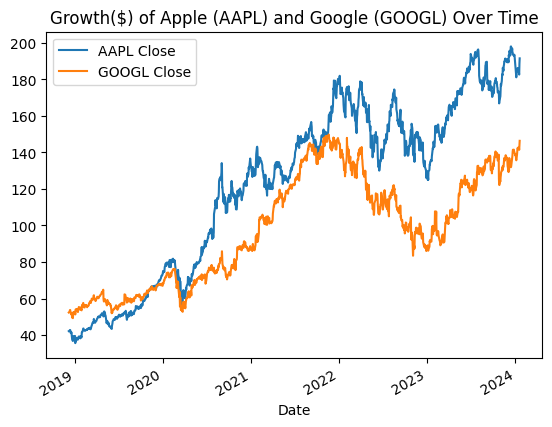

<Figure size 5000x1000 with 0 Axes>

In [23]:
# Create a subset of the stock data from the years 2018 to 2024.
# Stocks to analize: S&P500, FAANG (Meta, Apple, Amazon, Google)

# Create line graph of closing stock prices 
ax = all_df.loc[:,['AAPL Close', 'GOOGL Close']].plot()
plt.title('Growth($) of Apple (AAPL) and Google (GOOGL) Over Time')
plt.figure(figsize=(50,10))
plt.show()


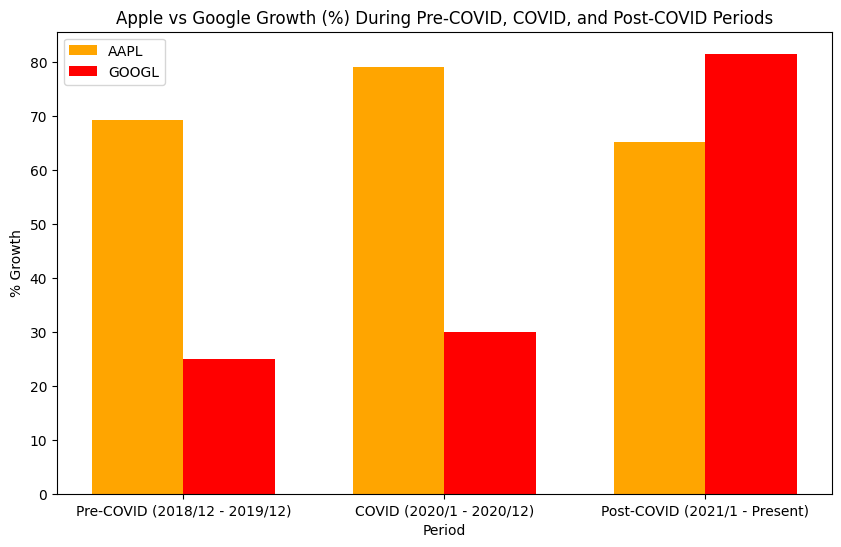

In [24]:
# Define the pre, covid, post ranges
pre_covid_start = '2018-12-07'
pre_covid_end = '2019-12-31'

covid_start = '2020-01-01'
covid_end = '2020-12-31'

post_covid_start = '2021-01-01'

# Filter the data for Apple and Google (assuming tech_df contains both)
pre_covid_df = tech_df.loc[pre_covid_start:pre_covid_end]
covid_df = tech_df.loc[covid_start:covid_end]
post_covid_df = tech_df.loc[post_covid_start:]

# Define
def calculate_growth(df, open_col, close_col):
    return ((df[close_col].iloc[-1] - df[open_col].iloc[0]) / df[open_col].iloc[0]) * 100

# Calculate total growth for each period (AAPL and GOOGL)
aapl_pre_covid_growth = calculate_growth(pre_covid_df, 'AAPL Open', 'AAPL Close')
aapl_covid_growth = calculate_growth(covid_df, 'AAPL Open', 'AAPL Close')
aapl_post_covid_growth = calculate_growth(post_covid_df, 'AAPL Open', 'AAPL Close')

googl_pre_covid_growth = calculate_growth(pre_covid_df, 'GOOGL Open', 'GOOGL Close')
googl_covid_growth = calculate_growth(covid_df, 'GOOGL Open', 'GOOGL Close')
googl_post_covid_growth = calculate_growth(post_covid_df, 'GOOGL Open', 'GOOGL Close')

# Bar chart for Apple vs Google
labels = ['Pre-COVID (2018/12 - 2019/12)', 'COVID (2020/1 - 2020/12)', 'Post-COVID (2021/1 - Present)']
aapl_growth = [aapl_pre_covid_growth, aapl_covid_growth, aapl_post_covid_growth]
googl_growth = [googl_pre_covid_growth, googl_covid_growth, googl_post_covid_growth]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, aapl_growth, width, label='AAPL', color='orange')
rects2 = ax.bar(x + width/2, googl_growth, width, label='GOOGL', color='red')

ax.set_xlabel('Period')
ax.set_ylabel('% Growth')
ax.set_title('Apple vs Google Growth (%) During Pre-COVID, COVID, and Post-COVID Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Text(0.5, 1.0, '% Change per 4 Months')

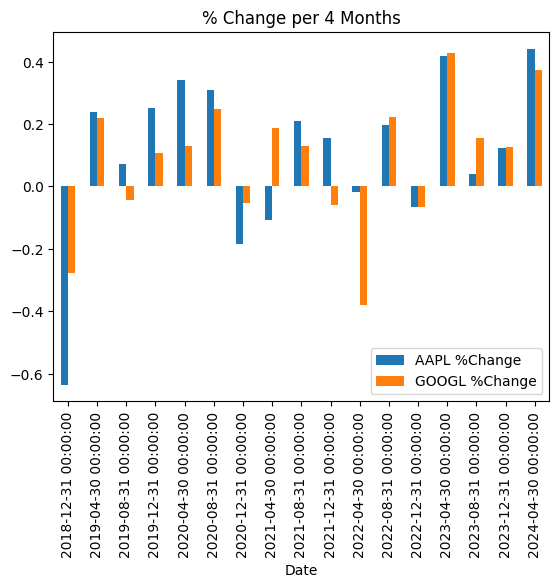

In [25]:
market.groupby(market.index)[['AAPL %Change','GOOGL %Change']].sum().plot.bar()
plt.title('% Change per 4 Months')

** Question 2: What are trends in the cryptocurrency market before covid (2018), during  COVID (2020) and the present (2024)

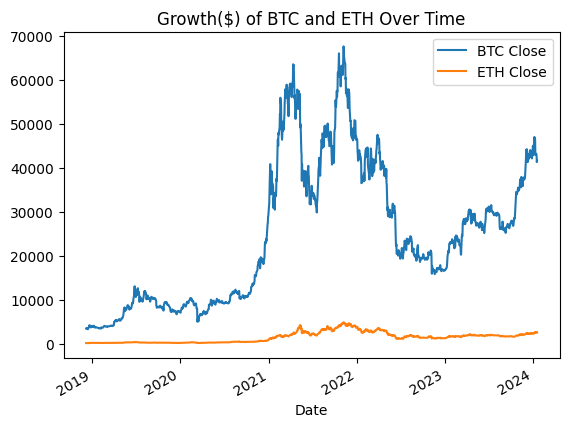

<Figure size 5000x1000 with 0 Axes>

In [26]:
ax = all_df.loc[:,['BTC Close', 'ETH Close']].plot()
plt.title('Growth($) of BTC and ETH Over Time')
plt.figure(figsize=(50,10))
plt.show()

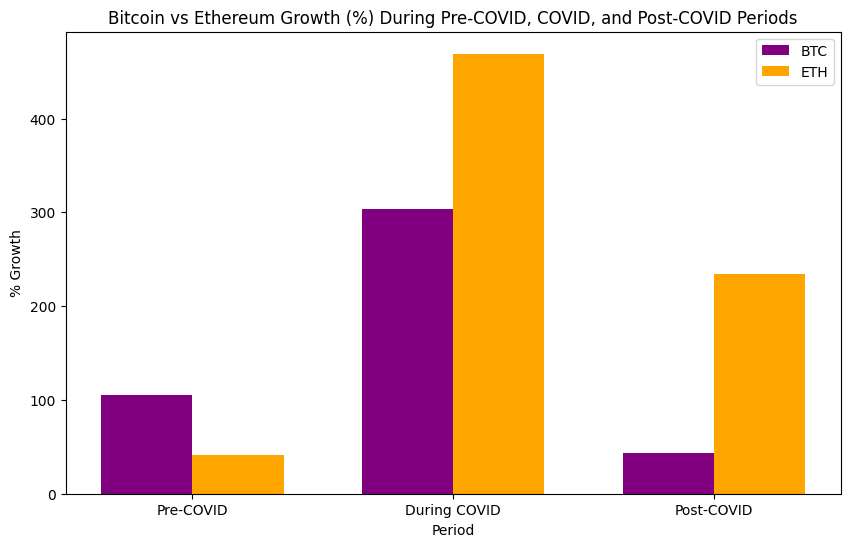

In [27]:
# Filter the data for each period
pre_covid_df = crypto_df.loc[pre_covid_start:pre_covid_end]
covid_df = crypto_df.loc[covid_start:covid_end]
post_covid_df = crypto_df.loc[post_covid_start:]

# Calculate total growth for each period (BTC and ETH)
btc_pre_covid_growth = calculate_growth(pre_covid_df, 'BTC Open', 'BTC Close')
btc_covid_growth = calculate_growth(covid_df, 'BTC Open', 'BTC Close')
btc_post_covid_growth = calculate_growth(post_covid_df, 'BTC Open', 'BTC Close')

eth_pre_covid_growth = calculate_growth(pre_covid_df, 'ETH Open', 'ETH Close')
eth_covid_growth = calculate_growth(covid_df, 'ETH Open', 'ETH Close')
eth_post_covid_growth = calculate_growth(post_covid_df, 'ETH Open', 'ETH Close')

# Bar chart for Bitcoin vs Ethereum
labels = ['Pre-COVID', 'During COVID', 'Post-COVID']
btc_growth = [btc_pre_covid_growth, btc_covid_growth, btc_post_covid_growth]
eth_growth = [eth_pre_covid_growth, eth_covid_growth, eth_post_covid_growth]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, btc_growth, width, label='BTC', color='purple')
rects2 = ax.bar(x + width/2, eth_growth, width, label='ETH', color='orange')

ax.set_xlabel('Period')
ax.set_ylabel('% Growth')
ax.set_title('Bitcoin vs Ethereum Growth (%) During Pre-COVID, COVID, and Post-COVID Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(0.5, 1.0, '% Change per 4 Months')

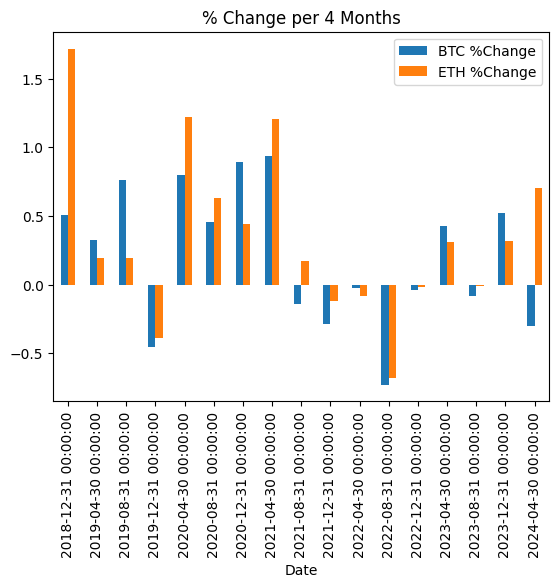

In [28]:
market.groupby(market.index)[['BTC %Change','ETH %Change']].sum().plot.bar()
plt.title('% Change per 4 Months')

** Question 3: What are trends in the Pharma stocks before covid (2018), during  COVID (2020) and the present (2024)

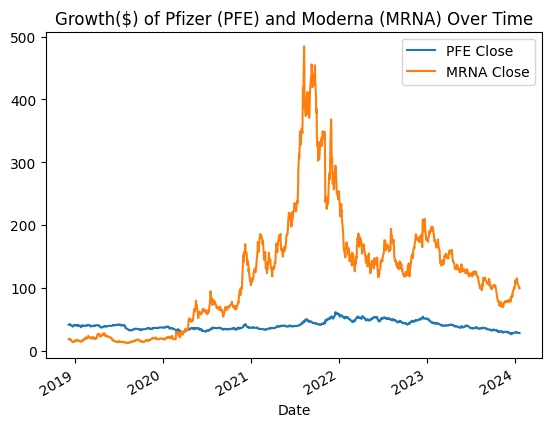

<Figure size 5000x1000 with 0 Axes>

In [29]:
ax = all_df.loc[:,['PFE Close', 'MRNA Close']].plot()
plt.title('Growth($) of Pfizer (PFE) and Moderna (MRNA) Over Time')
plt.figure(figsize=(50,10))
plt.show()

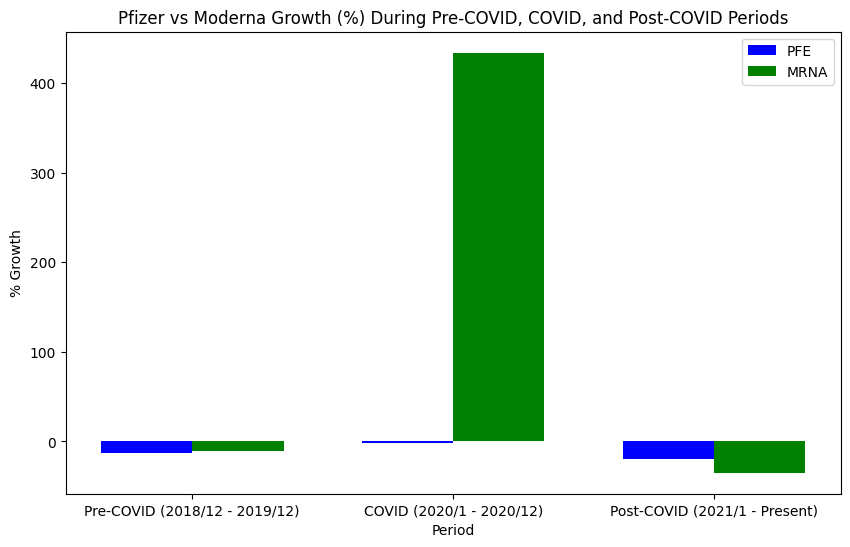

In [30]:
#Calculate growth pharma stock pre, covid and post

# funtion to calculate growth
def calculate_growth(df, open_col, close_col):
    return ((df[close_col].iloc[-1] - df[open_col].iloc[0]) / df[open_col].iloc[0]) * 100


# Define the pre, covid, post ranges
pre_covid_start = '2018-12-07'
pre_covid_end = '2019-12-31'

covid_start = '2020-01-01'
covid_end = '2020-12-31'

post_covid_start = '2021-01-01'

# Filter the data for each period
pre_covid_df = pharma_df.loc[pre_covid_start:pre_covid_end]
covid_df = pharma_df.loc[covid_start:covid_end]
post_covid_df = pharma_df.loc[post_covid_start:]

# Calculate total growth for each period (PFE and MRNA)
pfe_pre_covid_growth = calculate_growth(pre_covid_df, 'PFE Open', 'PFE Close')
pfe_covid_growth = calculate_growth(covid_df, 'PFE Open', 'PFE Close')
pfe_post_covid_growth = calculate_growth(post_covid_df, 'PFE Open', 'PFE Close')

mrna_pre_covid_growth = calculate_growth(pre_covid_df, 'MRNA Open', 'MRNA Close')
mrna_covid_growth = calculate_growth(covid_df, 'MRNA Open', 'MRNA Close')
mrna_post_covid_growth = calculate_growth(post_covid_df, 'MRNA Open', 'MRNA Close')

# Bar chart for Pfizer vs Moderna
labels = ['Pre-COVID (2018/12 - 2019/12)', 'COVID (2020/1 - 2020/12)', 'Post-COVID (2021/1 - Present)']
pfe_growth = [pfe_pre_covid_growth, pfe_covid_growth, pfe_post_covid_growth]
mrna_growth = [mrna_pre_covid_growth, mrna_covid_growth, mrna_post_covid_growth]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pfe_growth, width, label='PFE', color='blue')
rects2 = ax.bar(x + width/2, mrna_growth, width, label='MRNA', color='green')

ax.set_xlabel('Period')
ax.set_ylabel('% Growth')
ax.set_title('Pfizer vs Moderna Growth (%) During Pre-COVID, COVID, and Post-COVID Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Text(0.5, 1.0, '% Change per 4 Months')

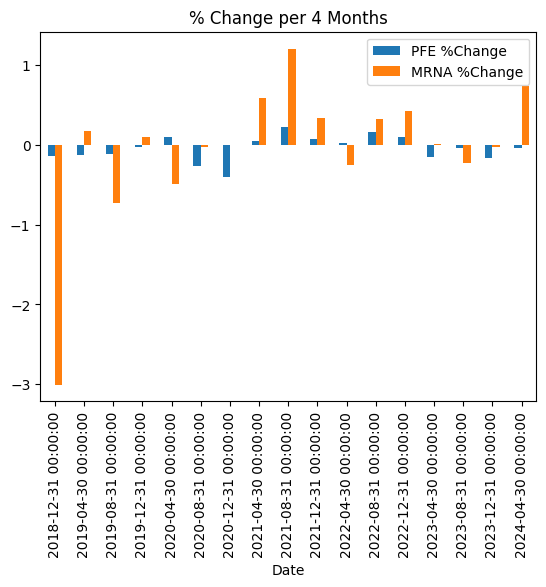

In [31]:
market.groupby(market.index)[['PFE %Change','MRNA %Change']].sum().plot.bar()
plt.title('% Change per 4 Months')

# Analyze correlations and identify patterns between the three markets



** Question 4: Are there similarities in trends between the three markets?

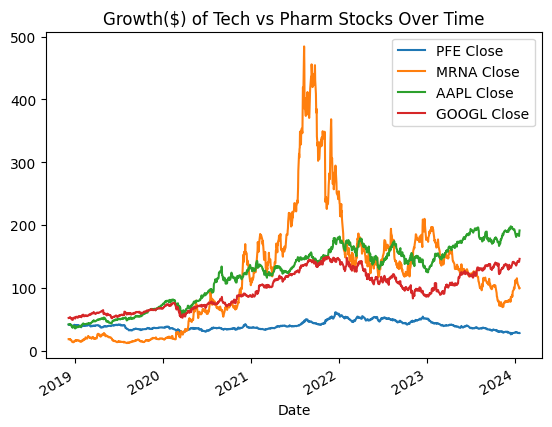

<Figure size 5000x1000 with 0 Axes>

In [32]:
all = all_df.loc[:,['PFE Close', 'MRNA Close', 'AAPL Close', 'GOOGL Close']].plot()
plt.title('Growth($) of Tech vs Pharm Stocks Over Time')
plt.figure(figsize=(50,10))
plt.show()



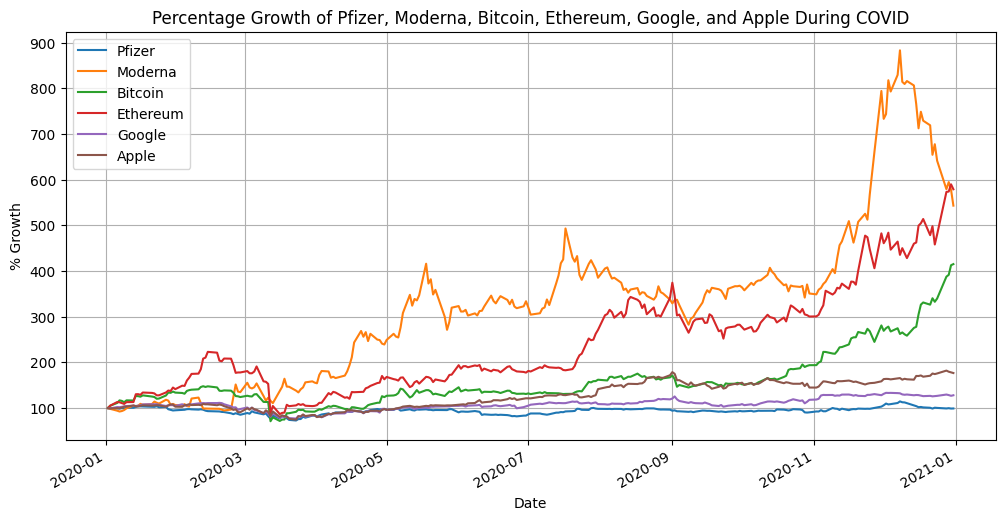

In [33]:
# Define the COVID period
covid_start = '2020-01-01'
covid_end = '2020-12-31'

# Filter the data for the COVID period
covid_df = all_df.loc[covid_start:covid_end]

# Create a new DataFrame to store the normalized cumulative percentage growth for each asset during COVID
cumulative_covid_growth_df = pd.DataFrame()

# Normalize the cumulative percentage growth for each asset by dividing by the first value and setting a baseline of 100%
cumulative_covid_growth_df['PFE Growth'] = (covid_df['PFE Close'] / covid_df['PFE Close'].iloc[0]) * 100
cumulative_covid_growth_df['MRNA Growth'] = (covid_df['MRNA Close'] / covid_df['MRNA Close'].iloc[0]) * 100
cumulative_covid_growth_df['BTC Growth'] = (covid_df['BTC Close'] / covid_df['BTC Close'].iloc[0]) * 100
cumulative_covid_growth_df['ETH Growth'] = (covid_df['ETH Close'] / covid_df['ETH Close'].iloc[0]) * 100
cumulative_covid_growth_df['GOOGL Growth'] = (covid_df['GOOGL Close'] / covid_df['GOOGL Close'].iloc[0]) * 100
cumulative_covid_growth_df['AAPL Growth'] = (covid_df['AAPL Close'] / covid_df['AAPL Close'].iloc[0]) * 100

# Plot the normalized cumulative percentage growth during COVID times
plt.figure(figsize=(12, 6))

# Plot each asset's normalized cumulative growth
cumulative_covid_growth_df.plot(ax=plt.gca())

# Add labels and title
plt.title('Percentage Growth of Pfizer, Moderna, Bitcoin, Ethereum, Google, and Apple During COVID')
plt.xlabel('Date')
plt.ylabel('% Growth')
plt.grid(True)

# Add a legend to the plot
plt.legend(['Pfizer', 'Moderna', 'Bitcoin', 'Ethereum', 'Google', 'Apple'])

# Show the plot
plt.show()


**Question 5: How Did COVID-19 Impact the Stock Market Before, During, and After the Pandemic?

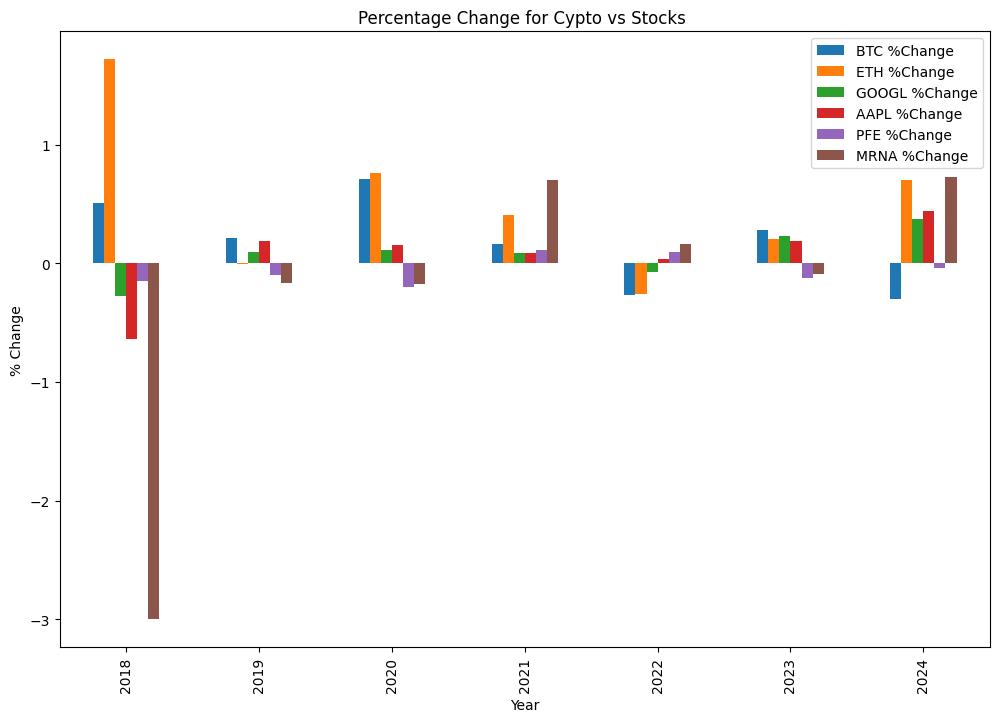

In [34]:
# Group by year and calculate the mean percentage change
mean_changes = all_df[['BTC %Change', 'ETH %Change', 'GOOGL %Change', 'AAPL %Change', 'PFE %Change', 'MRNA %Change']].groupby(all_df.index.year).mean()

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data on the specified axis
mean_changes.plot(kind="bar", ax=ax)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
ax.set_title('Percentage Change for Cypto vs Stocks ')

# Show the plot
plt.show()

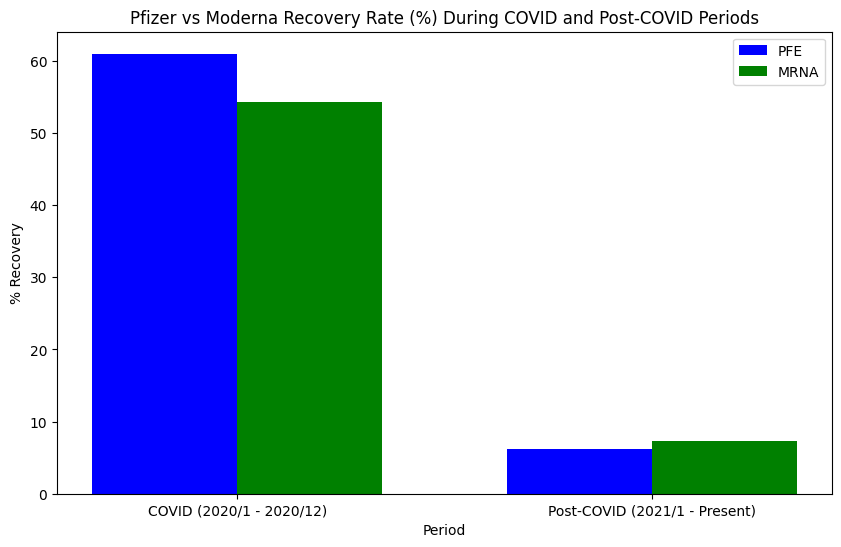

In [35]:
# Function to calculate recovery rate
def calculate_recovery_rate(df, open_col, close_col):
    peak_value = df[open_col].max()  # Max value during the period
    trough_value = df[close_col].min()  # Lowest closing value during the period
    recovery_value = df[close_col].iloc[-1]  # Final closing value during the period
    
    total_decline = peak_value - trough_value
    amount_recovered = recovery_value - trough_value
    
    if total_decline == 0:  # Avoid division by zero
        return 0
    
    recovery_rate = (amount_recovered / total_decline) * 100
    return recovery_rate

# Define the pre, covid, post ranges
covid_start = '2020-01-01'
covid_end = '2020-12-31'

post_covid_start = '2021-01-01'

# Filter the data for each period
covid_df = all_df.loc[covid_start:covid_end]
post_covid_df = all_df.loc[post_covid_start:]

# Calculate recovery rate for each period (PFE and MRNA)
pfe_covid_recovery = calculate_recovery_rate(covid_df, 'PFE Open', 'PFE Close')
pfe_post_covid_recovery = calculate_recovery_rate(post_covid_df, 'PFE Open', 'PFE Close')

mrna_covid_recovery = calculate_recovery_rate(covid_df, 'MRNA Open', 'MRNA Close')
mrna_post_covid_recovery = calculate_recovery_rate(post_covid_df, 'MRNA Open', 'MRNA Close')

# Bar chart for Pfizer vs Moderna showing recovery rate
labels = ['COVID (2020/1 - 2020/12)', 'Post-COVID (2021/1 - Present)']
pfe_recovery = [pfe_covid_recovery, pfe_post_covid_recovery]
mrna_recovery = [mrna_covid_recovery, mrna_post_covid_recovery]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pfe_recovery, width, label='PFE', color='blue')
rects2 = ax.bar(x + width/2, mrna_recovery, width, label='MRNA', color='green')

ax.set_xlabel('Period')
ax.set_ylabel('% Recovery')
ax.set_title('Pfizer vs Moderna Recovery Rate (%) During COVID and Post-COVID Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()





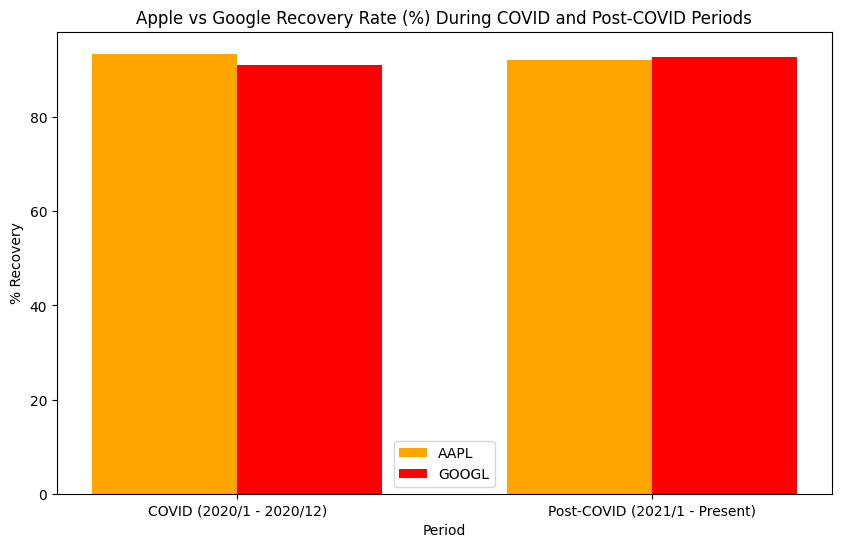

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate recovery rate
def calculate_recovery_rate(df, open_col, close_col):
    peak_value = df[open_col].max()  # Max value during the period
    trough_value = df[close_col].min()  # Lowest closing value during the period
    recovery_value = df[close_col].iloc[-1]  # Final closing value during the period
    
    total_decline = peak_value - trough_value
    amount_recovered = recovery_value - trough_value
    
    if total_decline == 0:  # Avoid division by zero
        return 0
    
    recovery_rate = (amount_recovered / total_decline) * 100
    return recovery_rate

# Define the pre, covid, post ranges
covid_start = '2020-01-01'
covid_end = '2020-12-31'

post_covid_start = '2021-01-01'

# Filter the data for each period
covid_df = all_df.loc[covid_start:covid_end]
post_covid_df = all_df.loc[post_covid_start:]

# Calculate recovery rate for each period (AAPL and GOOGL)
aapl_covid_recovery = calculate_recovery_rate(covid_df, 'AAPL Open', 'AAPL Close')
aapl_post_covid_recovery = calculate_recovery_rate(post_covid_df, 'AAPL Open', 'AAPL Close')


googl_covid_recovery = calculate_recovery_rate(covid_df, 'GOOGL Open', 'GOOGL Close')
googl_post_covid_recovery = calculate_recovery_rate(post_covid_df, 'GOOGL Open', 'GOOGL Close')

# Bar chart for Apple vs Google showing recovery rate
labels = ['COVID (2020/1 - 2020/12)', 'Post-COVID (2021/1 - Present)']
aapl_recovery = [aapl_covid_recovery, aapl_post_covid_recovery]
googl_recovery = [googl_covid_recovery, googl_post_covid_recovery]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, aapl_recovery, width, label='AAPL', color='orange')
rects2 = ax.bar(x + width/2, googl_recovery, width, label='GOOGL', color='red')

ax.set_xlabel('Period')
ax.set_ylabel('% Recovery')
ax.set_title('Apple vs Google Recovery Rate (%) During COVID and Post-COVID Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


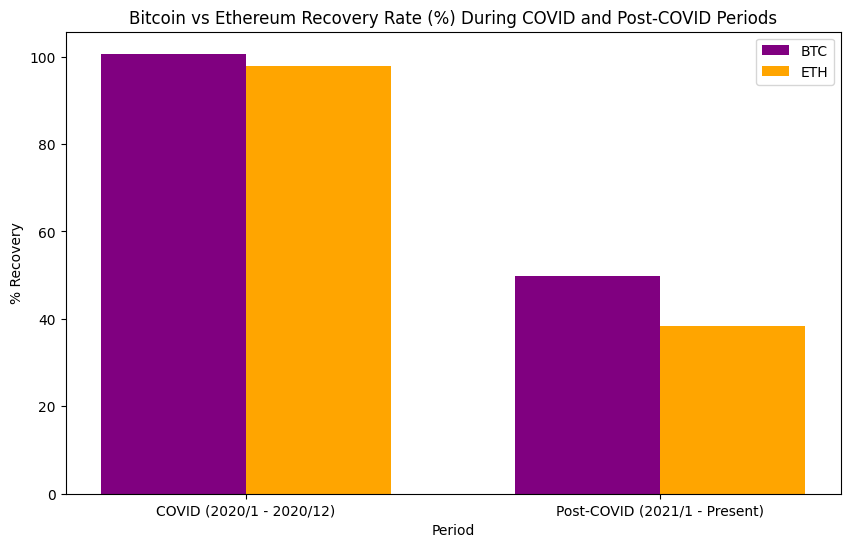

In [37]:
# Function to calculate recovery rate
def calculate_recovery_rate(df, open_col, close_col):
    peak_value = df[open_col].max()  # Max value during the period
    trough_value = df[close_col].min()  # Lowest closing value during the period
    recovery_value = df[close_col].iloc[-1]  # Final closing value during the period
    
    total_decline = peak_value - trough_value
    amount_recovered = recovery_value - trough_value
    
    if total_decline == 0:  # Avoid division by zero
        return 0
    
    recovery_rate = (amount_recovered / total_decline) * 100
    return recovery_rate

# Define covid and post ranges

covid_start = '2020-01-01'
covid_end = '2020-12-31'

post_covid_start = '2021-01-01'

# Filter the data for each period
pre_covid_df = all_df.loc[pre_covid_start:pre_covid_end]
covid_df = all_df.loc[covid_start:covid_end]
post_covid_df = all_df.loc[post_covid_start:]

# Calculate recovery rate for each period (BTC and ETH)
btc_covid_recovery = calculate_recovery_rate(covid_df, 'BTC Open', 'BTC Close')
btc_post_covid_recovery = calculate_recovery_rate(post_covid_df, 'BTC Open', 'BTC Close')

eth_covid_recovery = calculate_recovery_rate(covid_df, 'ETH Open', 'ETH Close')
eth_post_covid_recovery = calculate_recovery_rate(post_covid_df, 'ETH Open', 'ETH Close')

# Bar chart for Bitcoin vs Ethereum showing recovery rate
labels = ['COVID (2020/1 - 2020/12)', 'Post-COVID (2021/1 - Present)']
btc_recovery = [btc_covid_recovery, btc_post_covid_recovery]
eth_recovery = [eth_covid_recovery, eth_post_covid_recovery]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, btc_recovery, width, label='BTC', color='purple')
rects2 = ax.bar(x + width/2, eth_recovery, width, label='ETH', color='orange')

ax.set_xlabel('Period')
ax.set_ylabel('% Recovery')
ax.set_title('Bitcoin vs Ethereum Recovery Rate (%) During COVID and Post-COVID Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



# Volatility of Cryptocurrencies vs Stocks

** Question 6: Are cryptocurrencies more prone to extreme price swings than traditional stocks during global events?

In [38]:
# Calculate the volatility (standard deviation) and variance during covid

covid_start = '2020-01-01'
covid_end = '2020-12-31'

# Filter the data for the COVID period
covid_df = all_df.loc[covid_start:covid_end]

# standard deviation
btc_volatility = crypto_df['BTC %Change'].std()
eth_volatility = crypto_df['ETH %Change'].std()
pfe_volatility = pharma_df['PFE %Change'].std()
mrna_volatility = pharma_df['MRNA %Change'].std()
googl_volatility = tech_df['GOOGL %Change'].std()
aapl_volatility = tech_df['AAPL %Change'].std()

# variance
btc_variance = crypto_df['BTC %Change'].var()
eth_variance = crypto_df['ETH %Change'].var()
pfe_variance = pharma_df['PFE %Change'].var()
mrna_variance = pharma_df['MRNA %Change'].var()
googl_variance = tech_df['GOOGL %Change'].var()
aapl_variance = tech_df['AAPL %Change'].var()

print(f"Bitcoin (BTC) Volatility: {btc_volatility:.4f}, Variance: {btc_variance:.4f}")
print(f"Ethereum (ETH) Volatility: {eth_volatility:.4f}, Variance: {eth_variance:.4f}")
print(f"Pfizer (PFE) Volatility: {pfe_volatility:.4f}, Variance: {pfe_variance:.4f}")
print(f"Moderna (MRNA) Volatility: {mrna_volatility:.4f}, Variance: {mrna_variance:.4f}")
print(f"Google (GOOGL) Volatility: {googl_volatility:.4f}, Variance: {googl_variance:.4f}")
print(f"Apple (AAPL) Volatility: {aapl_volatility:.4f}, Variance: {aapl_variance:.4f}")


Bitcoin (BTC) Volatility: 3.7569, Variance: 14.1147
Ethereum (ETH) Volatility: 4.7237, Variance: 22.3136
Pfizer (PFE) Volatility: 1.3541, Variance: 1.8335
Moderna (MRNA) Volatility: 4.0222, Variance: 16.1781
Google (GOOGL) Volatility: 1.4495, Variance: 2.1010
Apple (AAPL) Volatility: 1.5049, Variance: 2.2649


C:\Users\zbrown\AppData\Local\Temp\ipykernel_31032\762170255.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


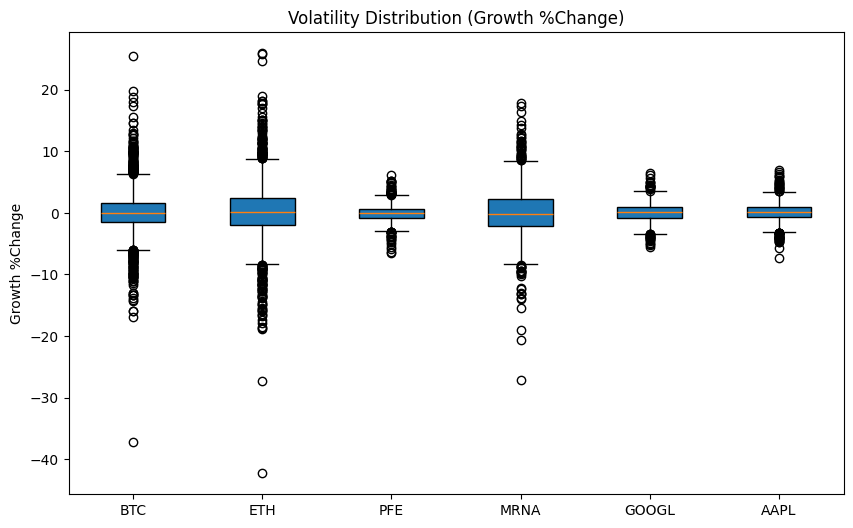

In [39]:
# Create a box plot to show the volatility distribution.

data = [
    crypto_df['BTC %Change'],
    crypto_df['ETH %Change'],
    pharma_df['PFE %Change'],
    pharma_df['MRNA %Change'],
    tech_df['GOOGL %Change'],
    tech_df['AAPL %Change']
]

# Create labels for the box plot
labels = ['BTC', 'ETH', 'PFE', 'MRNA', 'GOOGL', 'AAPL']

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

# Add title and labels
plt.title('Volatility Distribution (Growth %Change)')
plt.ylabel('Growth %Change')

# Show the plot
plt.show()

#the bigger the square, the more volitile. Also check above and below to see if stock had a higher percent change or not.